# 영화 추천

```
데이터 
무비렌즈(movielens)에서 수집한 실제 영화, 관객 데이터
•	2017년 7월 이전에 개봉한 9,000개 영화의 샘플 데이터와 해당 영화 관객의 평점 수집 샘플 데이터
•	출처 : https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7
•	테이블 종류
1. movies_metadata.csv : 영화 메타 테이블
   (영화id, 제목, 개봉일, runtime, 평가 점수 평균, 평가 수, 장르 등)
2. ratings_movielens.csv : 
   개인당 영화 평점 기록 (개인id, 영화id, 평점, time)
3. genre_info : 영화의 장르정보 (id, genre_name)
※ 위 1~3 데이터에서 id, userId, movieId 는 String Type으로 하시오.
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [3]:
movies = pd.read_csv('data/meta_simple.csv')
print(movies.shape)
movies.head()

(1801, 5)


id release_date      revenue  runtime                           title
0  1371   1982-05-28  270000000.0     99.0                       Rocky III
1  1405   1924-12-04          0.0    140.0                           Greed
2  2105   1999-07-09  235483004.0     95.0                    American Pie
3  2193   1983-03-04   22587000.0     97.0                        My Tutor
4  2294   2001-08-22   33788161.0    104.0  Jay and Silent Bob Strike Back

In [4]:
ratings = pd.read_csv('data/ratings_movielens.csv')
ratings.head()

userId  movieId  rating     timestamp
0       1     1371     2.5  1.260759e+09
1       4     1371     4.0  9.498103e+08
2       7     1371     3.0  8.518692e+08
3      19     1371     4.0  8.551934e+08
4      21     1371     3.0  8.538523e+08

In [5]:
genre = pd.read_csv('data/genre_info.csv')
genre.head()

id genre_name
0  1371      Drama
1  1405      Drama
2  1405    History
3  2105     Comedy
4  2105    Romance

In [6]:
genre = genre.drop(genre.loc[4417:4431].index)

In [7]:
genre[genre['id'] == 4912]

id genre_name
4412  4912     Comedy
4413  4912      Crime
4414  4912      Drama
4415  4912    Romance
4416  4912   Thriller

In [8]:
genre = genre.reset_index(drop=True)
genre

id genre_name
0      1371      Drama
1      1405      Drama
2      1405    History
3      2105     Comedy
4      2105    Romance
...     ...        ...
4534  87884      Crime
4535  92424    Romance
4536  92424     Comedy
4537  95752      Drama
4538  95752    Romance

[4539 rows x 2 columns]

## Q 1

```
메타에 id가 중복된 영화가 있다. 이 영화는 제거하고 분석을 수행한다. 영화 메타 테이블로부터 개봉연도별 영화의 특징을 살펴보고자 한다.
연도별 개봉영화수, 영화당 평균 수익(revenue), 연도별 영화당 평균 런타임(runtime)에 대한 라인차트를 각각 그리시오. 단, 1971년부터 2012년까지 개봉된 영화가 30건 초과인 연도(16개 년도)만을 대상으로 한다.
```

In [10]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors="coerce")

In [11]:
# release_date 날짜 변환 
movies['release_date'] = pd.to_datetime(movies['release_date'], errors="coerce")# 코드변환 (오류 처리)
movies = movies.loc[movies['release_date'].notnull()]

In [12]:
movies

id release_date      revenue  runtime  \
0      1371   1982-05-28  270000000.0     99.0   
1      1405   1924-12-04          0.0    140.0   
2      2105   1999-07-09  235483004.0     95.0   
3      2193   1983-03-04   22587000.0     97.0   
4      2294   2001-08-22   33788161.0    104.0   
...     ...          ...          ...      ...   
1796  62764   2012-03-15  183018522.0    106.0   
1797  77291   1999-04-21          0.0    110.0   
1798  87884   1974-05-29          0.0     98.0   
1799  92424   2011-11-23          0.0     85.0   
1800  95752   1978-02-10          0.0    100.0   

                                        title  
0                                   Rocky III  
1                                       Greed  
2                                American Pie  
3                                    My Tutor  
4              Jay and Silent Bob Strike Back  
...                                       ...  
1796                            Mirror Mirror  
1797                                    Orfeu  
1798                              The Teacher  
1799                          The Art of Love  
1800  The Other Side of the Mountain: Part II  

[1797 rows x 5 columns]

In [13]:
# 중복된 id 제거
movies = movies.drop_duplicates('id') # 코드변환
movies.shape

(1794, 5)

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 0 to 1800
Data columns (total 5 columns):
id              1794 non-null int64
release_date    1794 non-null datetime64[ns]
revenue         1794 non-null float64
runtime         1793 non-null float64
title           1794 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 84.1+ KB


In [15]:
# year 추출
movies['release_year'] = movies['release_date'].dt.year # 코드변환

In [16]:
movies

id release_date      revenue  runtime  \
0      1371   1982-05-28  270000000.0     99.0   
1      1405   1924-12-04          0.0    140.0   
2      2105   1999-07-09  235483004.0     95.0   
3      2193   1983-03-04   22587000.0     97.0   
4      2294   2001-08-22   33788161.0    104.0   
...     ...          ...          ...      ...   
1796  62764   2012-03-15  183018522.0    106.0   
1797  77291   1999-04-21          0.0    110.0   
1798  87884   1974-05-29          0.0     98.0   
1799  92424   2011-11-23          0.0     85.0   
1800  95752   1978-02-10          0.0    100.0   

                                        title  release_year  
0                                   Rocky III          1982  
1                                       Greed          1924  
2                                American Pie          1999  
3                                    My Tutor          1983  
4              Jay and Silent Bob Strike Back          2001  
...                                       ...           ...  
1796                            Mirror Mirror          2012  
1797                                    Orfeu          1999  
1798                              The Teacher          1974  
1799                          The Art of Love          2011  
1800  The Other Side of the Mountain: Part II          1978  

[1794 rows x 6 columns]

In [18]:
# 1971년 ~ 2012년 사이 필터링
movies_ = movies.loc[(movies['release_year'] >= 1971) & (movies['release_year'] <= 2021)]
movies_

id release_date      revenue  runtime  \
0      1371   1982-05-28  270000000.0     99.0   
2      2105   1999-07-09  235483004.0     95.0   
3      2193   1983-03-04   22587000.0     97.0   
4      2294   2001-08-22   33788161.0    104.0   
5      2455   1983-08-10          0.0    110.0   
...     ...          ...          ...      ...   
1796  62764   2012-03-15  183018522.0    106.0   
1797  77291   1999-04-21          0.0    110.0   
1798  87884   1974-05-29          0.0     98.0   
1799  92424   2011-11-23          0.0     85.0   
1800  95752   1978-02-10          0.0    100.0   

                                        title  release_year  
0                                   Rocky III          1982  
2                                American Pie          1999  
3                                    My Tutor          1983  
4              Jay and Silent Bob Strike Back          2001  
5                        Confidentially Yours          1983  
...                                       ...           ...  
1796                            Mirror Mirror          2012  
1797                                    Orfeu          1999  
1798                              The Teacher          1974  
1799                          The Art of Love          2011  
1800  The Other Side of the Mountain: Part II          1978  

[1404 rows x 6 columns]

In [19]:
# release_year로 group 한 후 revenue, runtime에 대하여 count, mean 통계량 확인
chart = movies_.groupby('release_year')[['revenue', 'runtime']].agg(['count', 'mean'])
chart

revenue               runtime            
               count          mean   count        mean
release_year                                          
1971              16  5.135356e+06      16  111.500000
1972              19  2.060387e+07      19  114.842105
1973              16  1.913974e+07      16  102.875000
1974              17  9.896246e+06      17  101.882353
1975              17  1.074565e+07      17  114.294118
1976              15  1.493318e+07      15  104.466667
1977              10  1.049838e+08      10  121.200000
1978              14  3.254925e+07      14  104.571429
1979              13  4.915005e+07      13  108.846154
1980              15  1.933355e+07      15  116.733333
1981              12  4.715679e+07      12  108.500000
1982              16  4.633419e+07      16  117.000000
1983              16  6.290998e+07      16  109.937500
1984              20  2.526039e+07      20  105.350000
1985              18  5.551575e+07      18  101.611111
1986              17  2.326217e+07      17   94.764706
1987              24  4.712616e+07      24  104.208333
1988              26  4.468376e+07      26  102.576923
1989              25  7.665209e+07      25  114.880000
1990              33  6.941271e+07      33  106.909091
1991              33  7.348024e+07      33  114.939394
1992              26  8.114083e+07      26  115.615385
1993              25  9.520813e+07      25  110.680000
1994              32  7.073259e+07      32  110.125000
1995              35  6.947715e+07      35  106.400000
1996              30  5.872275e+07      30  111.366667
1997              43  1.178357e+08      43  115.023256
1998              49  6.774374e+07      48  106.750000
1999              45  8.126152e+07      45  114.400000
2000              62  7.193598e+07      62  108.016129
2001              65  7.279260e+07      65  110.184615
2002              61  9.341256e+07      61  108.786885
2003              62  1.085369e+08      62  111.983871
2004              87  9.804467e+07      87  109.931034
2005              71  9.742915e+07      71  109.436620
2006             105  7.108525e+07     105  106.114286
2007              98  6.594199e+07      98  103.836735
2008              48  9.412453e+07      48  109.416667
2009              29  8.840666e+07      29   99.103448
2010              17  9.739729e+05      17   93.000000
2011              14  2.403287e+07      14   93.000000
2012               5  3.660370e+07       5   97.800000
2013               2  0.000000e+00       2   61.000000
2015               1  5.660060e+05       1  118.000000

In [20]:
# 30개 이상 필터링
chart.loc[chart[('revenue', 'count')] >= 30]

revenue               runtime            
               count          mean   count        mean
release_year                                          
1990              33  6.941271e+07      33  106.909091
1991              33  7.348024e+07      33  114.939394
1994              32  7.073259e+07      32  110.125000
1995              35  6.947715e+07      35  106.400000
1996              30  5.872275e+07      30  111.366667
1997              43  1.178357e+08      43  115.023256
1998              49  6.774374e+07      48  106.750000
1999              45  8.126152e+07      45  114.400000
2000              62  7.193598e+07      62  108.016129
2001              65  7.279260e+07      65  110.184615
2002              61  9.341256e+07      61  108.786885
2003              62  1.085369e+08      62  111.983871
2004              87  9.804467e+07      87  109.931034
2005              71  9.742915e+07      71  109.436620
2006             105  7.108525e+07     105  106.114286
2007              98  6.594199e+07      98  103.836735
2008              48  9.412453e+07      48  109.416667

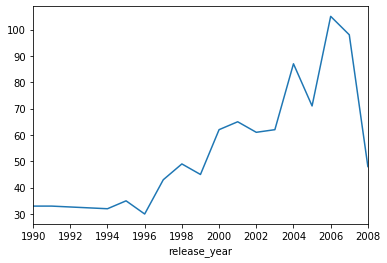

In [21]:
# 연도별 개봉 영화수 (단, 연도별 영화가 30건 이상인 연도만)
chart.loc[chart[('revenue', 'count')] >= 30, ('revenue', 'count')].plot()

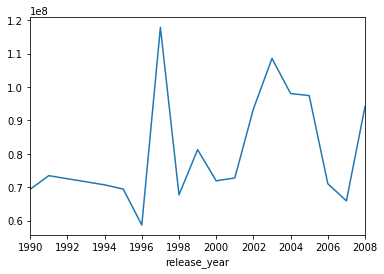

In [22]:
# 평균 revenue (단, 연도별 영화가 30건 이상인 연도만)
chart.loc[chart[('revenue', 'count')] >= 30, ('revenue', 'mean')].plot()

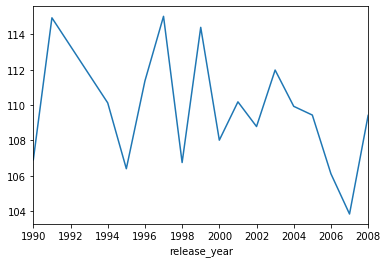

In [23]:
# 평균 runtime (단, 연도별 영화가 30건 이상인 연도만)
chart.loc[chart[('revenue', 'count')] >= 30, ('runtime', 'mean')].plot()

## Q 2

```
평점은 특정 영화를 본 사람만이 줄 수 있으며, 모든 영화를 시청하면 반드시 그 영화에 대한 평점을 준다고 가정한다. 
이 때, 가장 많이 본 영화(개인당 영화 평점 기록인 ratings_movielens.csv에 평점을 많이 남긴 영화) 순으로 순위를 매기고자 한다.

즉, 순위(평점을 준 고객수 순으로 영화의 순위를 부여), 영화id, 영화제목(title), 평점고객수, 평점고객 누적수, 영화당 평균 평점도 함께 산출하시오. 
이 데이터를 활용하여 X축을 순위, Y축을 왼쪽에는 고객수, 오른쪽에는 누적고객수로 하여 파레토 그림을 그리시오.
```

In [24]:
ratings.head()

userId  movieId  rating     timestamp
0       1     1371     2.5  1.260759e+09
1       4     1371     4.0  9.498103e+08
2       7     1371     3.0  8.518692e+08
3      19     1371     4.0  8.551934e+08
4      21     1371     3.0  8.538523e+08

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43246 entries, 0 to 43245
Data columns (total 4 columns):
userId       43246 non-null int64
movieId      43246 non-null int64
rating       43246 non-null float64
timestamp    43246 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.3 MB


In [27]:
# movieId 별 userId 별 갯수 (내림차순 정렬)
ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)

movieId
296      324
318      311
593      304
260      291
480      274
        ... 
7211       1
957        1
37736      1
6877       1
6037       1
Name: userId, Length: 1892, dtype: int64

In [28]:
chart1 = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)
chart1

movieId
296      324
318      311
593      304
260      291
480      274
        ... 
7211       1
957        1
37736      1
6877       1
6037       1
Name: userId, Length: 1892, dtype: int64

In [29]:
chart2 = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False).cumsum()
chart2

movieId
296        324
318        635
593        939
260       1230
480       1504
         ...  
7211     43242
957      43243
37736    43244
6877     43245
6037     43246
Name: userId, Length: 1892, dtype: int64

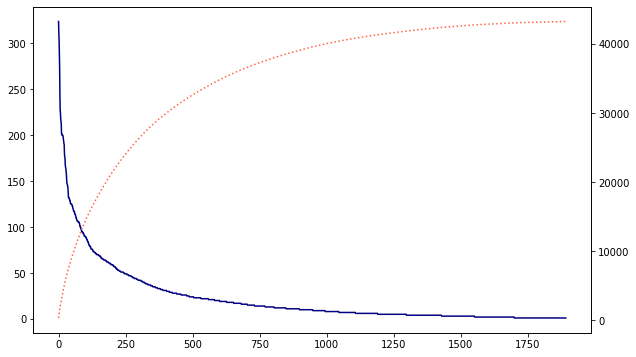

In [30]:
# X축을 순위, Y축을 왼쪽에는 고객수, 오른쪽에는 누적고객수로 하여 파레토 그림을 그리시오.
plt.figure(figsize=(10, 6))
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis

ax1.plot(np.arange(len(chart1)), chart1, color='navy')
ax2.plot(np.arange(len(chart2)), chart2, linestyle=':', color='tomato')

plt.show()

## Q 3

```
사람들은 최신영화를 즐겨 찾는 경향이 있다고 가정하자. 최신영화 순으로 추천하고자 할 때, 추천리스트를 구성하시오. 단, 100명 이상이 평가한 영화 즉 100명 이상이 본 영화만 대상으로 한다. 이 때 10위에 위치하는 영화제목은 무엇인가?

(답안예시) A
```

In [31]:
ratings.groupby('movieId')['userId'].nunique()


movieId
2         107
3          59
5          56
6         104
11         82
         ... 
132961      1
134368      5
140174      5
142507      1
158238      2
Name: userId, Length: 1892, dtype: int64

In [32]:
# ratings를 movieId로 그룹하여 userId 고유 갯수 
tmp = ratings.groupby('movieId')['userId'].nunique().reset_index()
tmp.columns = ['movieId', 'count']
tmp

movieId  count
0           2    107
1           3     59
2           5     56
3           6    104
4          11     82
...       ...    ...
1887   132961      1
1888   134368      5
1889   140174      5
1890   142507      1
1891   158238      2

[1892 rows x 2 columns]

In [33]:
# count 100개 이상 필터
ratings_100 = tmp.loc[tmp['count'] >= 100]

movieId  count
0           2    107
3           6    104
17         25    101
56        110    228
57        111    118
...       ...    ...
1293     4973    125
1301     4993    200
1302     4995    114
1517     8961    126
1745    58559    121

[82 rows x 2 columns]

In [36]:
# ratings_100과 movies 병합(merge), release_date기준 내림차순 정렬
pd.merge(ratings_100, movies, left_on="movieId", right_on="id").sort_values('release_date', ascending=False).head(10)

movieId  count     id release_date      revenue  runtime  \
81    58559    121  58559   2012-08-29          0.0    120.0   
64     1961    119   1961   2007-10-01     173066.0     86.0   
71     2959    202   2959   2007-07-04   69307224.0     91.0   
67     2355    105   2355   2007-03-23   22222308.0    124.0   
55     1265    165   1265   2007-02-16  137587063.0     96.0   
54     1259    112   1259   2006-12-25   49469904.0     92.0   
36      588    215    588   2006-04-21   97607453.0    125.0   
26      434    106    434   2006-03-09          0.0     99.0   
10      231    158    231   2005-11-23   94000000.0    128.0   
2        25    101     25   2005-11-04   96889998.0    125.0   

                                   title  release_year  
81  Confession of a Child of the Century          2012  
64                      My Name Is Bruce          2007  
71                        License to Wed          2007  
67                         Reign Over Me          2007  
55                  Bridge to Terabithia          2007  
54                    Notes on a Scandal          2006  
36                           Silent Hill          2006  
26                          Tough Enough          2006  
10                               Syriana          2005  
2                                Jarhead          2005

**정답: Jarhead**

## Q 4

```
한 영화당 여러 개의 장르에 속할 수 있다. 

예를 들어, 어떤 영화가 로맨스 이면서 코메디일 수 있고, 어떤 영화는 스릴러 이면서 미스터리일 수 있다. 

어떤 장르의 영화를 많이 보는지 살펴보기 위해 평점 데이터에 있는 영화에 대해 장르별 고객수를 산출하고, 
고객수가 가장 적은 장르와 고객수가 가장 많은 장르를 차례로 작성하시오.
(답안예시) A
```

In [37]:
ratings.head()

userId  movieId  rating     timestamp
0       1     1371     2.5  1.260759e+09
1       4     1371     4.0  9.498103e+08
2       7     1371     3.0  8.518692e+08
3      19     1371     4.0  8.551934e+08
4      21     1371     3.0  8.538523e+08

In [38]:
genre.head()

id genre_name
0  1371      Drama
1  1405      Drama
2  1405    History
3  2105     Comedy
4  2105    Romance

In [39]:
# ratings와 genre 병합(merge)
tmp = pd.merge(ratings, genre, left_on='movieId', right_on='id', how='left') # 코드입력
tmp

userId  movieId  rating     timestamp       id genre_name
0            1     1371     2.5  1.260759e+09   1371.0      Drama
1            4     1371     4.0  9.498103e+08   1371.0      Drama
2            7     1371     3.0  8.518692e+08   1371.0      Drama
3           19     1371     4.0  8.551934e+08   1371.0      Drama
4           21     1371     3.0  8.538523e+08   1371.0      Drama
...        ...      ...     ...           ...      ...        ...
105333     299    87884     3.5  1.344179e+09  87884.0      Crime
105334     299    92424     4.0  1.344181e+09  92424.0    Romance
105335     299    92424     4.0  1.344181e+09  92424.0     Comedy
105336     299    95752     4.5  1.344179e+09  95752.0      Drama
105337     299    95752     4.5  1.344179e+09  95752.0    Romance

[105338 rows x 6 columns]

In [29]:
tmp.loc[tmp['movieId'] == 1405]

userId  movieId  rating     timestamp      id genre_name
47        1     1405     1.0  1.260759e+09  1405.0      Drama
48        1     1405     1.0  1.260759e+09  1405.0    History
49        7     1405     5.0  8.518670e+08  1405.0      Drama
50        7     1405     5.0  8.518670e+08  1405.0    History
51       15     1405     3.0  1.052897e+09  1405.0      Drama
..      ...      ...     ...           ...     ...        ...
134     634     1405     3.0  1.309492e+09  1405.0    History
135     654     1405     4.5  1.145393e+09  1405.0      Drama
136     654     1405     4.5  1.145393e+09  1405.0    History
137     664     1405     3.0  1.343731e+09  1405.0      Drama
138     664     1405     3.0  1.343731e+09  1405.0    History

[92 rows x 6 columns]

In [40]:
# genre_name별 movieId의 고유개수 확인
tmp.groupby('genre_name')['movieId'].nunique().sort_values(ascending=False)

genre_name
Drama             1009
Comedy             548
Thriller           463
Action             367
Romance            361
Crime              306
Adventure          251
ScienceFiction     225
Horror             188
Fantasy            147
Mystery            146
Family             100
History             95
Music               65
Documentary         63
War                 55
Animation           49
Western             44
Foreign             43
TVMovie             14
Name: movieId, dtype: int64

**정답: TVMovie, Drama**

## Q 5

```
userId가 짝수인 경우 남성, 홀수인 경우 여성이라고 가정하자. 

성별로 가장 많이 본 장르 Best를 구할 때, 여성이 가장 많이 본 장르 두 개와 남성이 가장 많이 본 장르 두 개를 차례로 작성하시오
(답안예시) A,B
```

In [41]:
# 남성 (userId == 짝수) 많이 본 장르
tmp.loc[tmp['userId'] % 2 == 0].groupby('genre_name')['movieId'].count().sort_values(ascending=False).head()

genre_name
Drama       12769
Comedy       6244
Thriller     5563
Action       4359
Romance      4071
Name: movieId, dtype: int64

In [42]:
tmp.loc[tmp['userId'] % 2 == 1].groupby('genre_name')['movieId'].count().sort_values(ascending=False).head()

genre_name
Drama       12019
Comedy       5986
Thriller     5276
Action       4124
Romance      3868
Name: movieId, dtype: int64

## Q 6

```
개인당 영화 평점 기록을 통해 평점을 평균적으로 가장 높게 받은 영화부터 순위를 매기고자 한다. 

단, 평점을 준 사람수가 100 명 초과인 경우에 대해서만 산출한다. 
이 때, Adventure 장르에서 1위인 영화의 영화id는 무엇인가?
(답안예시) 1234
```

In [33]:
ratings

userId  movieId  rating     timestamp
0           1     1371     2.5  1.260759e+09
1           4     1371     4.0  9.498103e+08
2           7     1371     3.0  8.518692e+08
3          19     1371     4.0  8.551934e+08
4          21     1371     3.0  8.538523e+08
...       ...      ...     ...           ...
43241     299    62764     4.5  1.344184e+09
43242     299    77291     5.0  1.344179e+09
43243     299    87884     3.5  1.344179e+09
43244     299    92424     4.0  1.344181e+09
43245     299    95752     4.5  1.344179e+09

[43246 rows x 4 columns]

In [43]:
# movieId로 그룹하여 rating에 대한 mean, count (mean에 대하여 내림차순정렬)
tmp1 = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)
tmp1

mean  count
movieId             
40226     5.0      1
74727     5.0      2
2984      5.0      1
759       5.0      2
6163      5.0      1
...       ...    ...
66659     0.5      1
63540     0.5      2
39408     0.5      1
27376     0.5      1
88950     0.5      1

[1892 rows x 2 columns]

In [44]:
# count기준 100개 이상 필터
tmp1 = tmp1.loc[tmp1['count'] >= 100].reset_index() # 코드입력
tmp1

movieId      mean  count
0       858  4.487500    200
1       318  4.487138    311
2       527  4.303279    244
3       608  4.256696    224
4       296  4.256173    324
..      ...       ...    ...
77      185  3.102941    102
78      434  3.084906    106
79     1917  3.044248    113
80      344  2.871429    175
81      153  2.782946    129

[82 rows x 3 columns]

In [45]:
# tmp1과 genre 병합(merge)
tmp1 = pd.merge(tmp1, genre, left_on='movieId', right_on='id', how='left')
tmp1

movieId      mean  count    id genre_name
0        858  4.487500    200   858     Comedy
1        858  4.487500    200   858      Drama
2        858  4.487500    200   858    Romance
3        318  4.487138    311   318      Drama
4        318  4.487138    311   318   Thriller
..       ...       ...    ...   ...        ...
199     1917  3.044248    113  1917   Thriller
200      344  2.871429    175   344      Crime
201      344  2.871429    175   344     Action
202      344  2.871429    175   344     Comedy
203      153  2.782946    129   153      Drama

[204 rows x 5 columns]

In [46]:
# Adventure 장르로 필터
tmp1.loc[tmp1['genre_name'] == 'Adventure']

movieId      mean  count    id genre_name
7        608  4.256696    224   608  Adventure
44       593  4.138158    304   593  Adventure
57      1732  3.995833    120  1732  Adventure
94      1682  3.886861    137  1682  Adventure
104     8961  3.861111    126  8961  Adventure
110     1265  3.839394    165  1265  Adventure
157      165  3.443662    142   165  Adventure
171      253  3.396000    125   253  Adventure
179      329  3.350877    114   329  Adventure
182     1721  3.332317    164  1721  Adventure
185      587  3.325397    126   587  Adventure

**정답: 608**

## Q 7

```
개인당 평점을 준 영화는 영화를 봤다고 가정한다. 

평점이 3점을 초과하는 경우, 개인별로 취향에 맞는 영화라고 판단하고 이들을 활용하여 추천 리스트를 만들고자 한다. 
즉 평점이 3점 이하이면 영화를 봤어도 영화에 대한 선호도가 떨어지기 때문에 관련 기록은 제외하고 추천리스트를 만들고자 한다. 
또한 평점이 3점 초과하는 영화가 둘 이상인 기록에 대해서만을 대상으로 추천리스트를 만든다.

최소 support 는 0.1, 최소 confidence는 0.3으로 할 때, 다음 질문에 답하시오.
```

In [47]:
# 3점 이상인 영화 필터링
recomm = ratings.loc[ratings['rating'] > 3]

In [48]:
# 중복된 영화 제목이 있을 수 있음.
movies[movies['title'] == '20_000 Leagues Under the Sea']

id release_date     revenue  runtime                         title  \
723   173   1954-12-23  28200000.0    127.0  20_000 Leagues Under the Sea   
899  2966   1997-05-11         0.0    158.0  20_000 Leagues Under the Sea   

     release_year  
723          1954  
899          1997

In [49]:
# recomm과 movies['id']를 병합
recomm = pd.merge(recomm, movies['id'], left_on='movieId', right_on='id', how='left').drop(['id', 'timestamp', 'rating'], 1)
recomm

userId  movieId
0           4     1371
1          19     1371
2          41     1371
3          78     1371
4         202     1371
...       ...      ...
26646     299    62764
26647     299    77291
26648     299    87884
26649     299    92424
26650     299    95752

[26651 rows x 2 columns]

In [50]:
# movieId를 문자열로 변환
recomm['movieId'] = recomm['movieId'].astype('str')

In [51]:
tb = pd.get_dummies(recomm, prefix='', prefix_sep='').groupby('userId').max().reset_index()
tb

userId  100  101  101362  1018  102  1023  1024  103  103048  ...  97593  \
0         1    0    0       0     0    0     0     0    0       0  ...      0   
1         2    0    0       0     0    0     0     0    0       0  ...      0   
2         3    0    0       0     0    0     0     0    0       0  ...      0   
3         4    0    0       0     0    0     0     0    0       0  ...      0   
4         5    0    0       0     0    0     0     0    0       0  ...      0   
..      ...  ...  ...     ...   ...  ...   ...   ...  ...     ...  ...    ...   
666     667    0    0       0     0    0     0     0    0       0  ...      0   
667     668    0    0       0     0    0     0     0    0       0  ...      0   
668     669    0    0       0     0    0     0     0    0       0  ...      0   
669     670    0    0       0     0    0     0     0    0       0  ...      0   
670     671    0    0       0     0    0     0     0    0       0  ...      0   

     97938  98122  982  984  98491  986  991  994  996  
0        0      0    0    0      0    0    0    0    0  
1        0      0    0    0      0    0    0    0    0  
2        0      0    0    0      0    0    0    0    0  
3        0      0    0    0      0    0    0    0    0  
4        0      0    0    0      0    0    0    0    0  
..     ...    ...  ...  ...    ...  ...  ...  ...  ...  
666      0      0    0    0      0    0    0    0    0  
667      0      0    0    0      0    0    0    0    0  
668      0      0    0    0      0    0    0    0    0  
669      0      0    0    0      0    0    0    0    0  
670      0      0    0    0      0    0    0    0    0  

[671 rows x 1721 columns]

## Q 7-1

```
(1) 영화 Sissi를 본 사람에게 Lift 기준으로 추천할 때 가장 적합한 영화의 제목은 무엇인가?  
(답안예시) Sissi
```

[apriori알고리즘](https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/)

In [53]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules  
from mlxtend.preprocessing import TransactionEncoder

# 최소 support 는 0.1
itemsets = apriori(tb.drop(['userId'], 1), min_support = 0.1, use_colnames=True)
itemsets

support              itemsets
0    0.147541                (1073)
1    0.168405                (1089)
2    0.251863                 (110)
3    0.154993                 (111)
4    0.166915                (1213)
..        ...                   ...
296  0.111773       (858, 318, 593)
297  0.101341       (527, 593, 608)
298  0.105812       (527, 858, 593)
299  0.101341       (858, 608, 593)
300  0.102832  (527, 593, 296, 318)

[301 rows x 2 columns]

In [54]:
# 최소 confidence는 0.3
results = association_rules(itemsets, metric="confidence", min_threshold=0.3) 
results

antecedents      consequents  antecedent support  consequent support  \
0        (1089)           (1213)            0.168405            0.166915   
1        (1213)           (1089)            0.166915            0.168405   
2        (1089)            (260)            0.168405            0.368107   
3        (1089)           (2959)            0.168405            0.259314   
4        (2959)           (1089)            0.259314            0.168405   
..          ...              ...                 ...                 ...   
584  (527, 318)       (593, 296)            0.207154            0.247392   
585  (593, 296)       (527, 318)            0.247392            0.207154   
586  (593, 318)       (527, 296)            0.248882            0.192250   
587  (296, 318)       (527, 593)            0.260805            0.187779   
588       (527)  (593, 296, 318)            0.318927            0.178838   

      support  confidence      lift  leverage  conviction  
0    0.102832    0.610619  3.658265  0.074722    2.139514  
1    0.102832    0.616071  3.658265  0.074722    2.166014  
2    0.101341    0.601770  1.634768  0.039350    1.586753  
3    0.107303    0.637168  2.457125  0.063633    2.041402  
4    0.107303    0.413793  2.457125  0.063633    1.418603  
..        ...         ...       ...       ...         ...  
584  0.102832    0.496403  2.006544  0.051583    1.494465  
585  0.102832    0.415663  2.006544  0.051583    1.356830  
586  0.102832    0.413174  2.149144  0.054984    1.376471  
587  0.102832    0.394286  2.099728  0.053858    1.340930  
588  0.102832    0.322430  1.802921  0.045795    1.211923  

[589 rows x 9 columns]

In [55]:
def movie_to_index(movie_name):
    return movies.loc[movies['title'] == movie_name, 'id']

def index_to_movie(idx):
    return movies.loc[movies['id'] == idx, 'title'].values[0]

In [56]:
results['antecedents_count'] = results['antecedents'].apply(lambda x: len(x))
results['consequents_count'] = results['consequents'].apply(lambda x: len(x))

In [57]:
results.loc[(results['antecedents_count'] == 1) & (results['consequents_count'] == 1) & (results['antecedents'] == {'457'})].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support   support  \
230       (457)       (377)            0.247392            0.162444  0.114754   
235       (457)       (380)            0.247392            0.169896  0.110283   
62        (457)       (150)            0.247392            0.225037  0.132638   
240       (457)       (480)            0.247392            0.259314  0.131148   
26        (457)       (110)            0.247392            0.251863  0.107303   

     confidence      lift  leverage  conviction  antecedents_count  \
230    0.463855  2.855477  0.074567    1.562183                  1   
235    0.445783  2.623864  0.068252    1.497797                  1   
62     0.536145  2.382470  0.076965    1.670699                  1   
240    0.530120  2.044315  0.066995    1.576331                  1   
26     0.433735  1.722107  0.044994    1.321178                  1   

     consequents_count  
230                  1  
235                  1  
62                   1  
240                  1  
26                   1

In [58]:
index_to_movie(377)

'A Nightmare on Elm Street'

**정답: A Nightmare on Elm Street**

## Q 7-2

```
영화 Point Break 를 본 사람들 중 2/3 (=0.667) 이상이 본 영화는 몇 인가?
(답안예시) 1
```

In [59]:
movie_to_index('Point Break')

85    1089
Name: id, dtype: int64

In [60]:
# confidence 기준 0.66 이상 필터
results.loc[(results['antecedents'] == {'1089'}) & (results['confidence'] > 0.66 )].sort_values('lift', ascending=False)

antecedents consequents  antecedent support  consequent support   support  \
10      (1089)       (608)            0.168405            0.290611  0.114754   
5       (1089)       (296)            0.168405            0.400894  0.146051   
8       (1089)       (593)            0.168405            0.385991  0.120715   

    confidence      lift  leverage  conviction  antecedents_count  \
10    0.681416  2.344770  0.065814    2.226693                  1   
5     0.867257  2.163306  0.078538    4.513264                  1   
8     0.716814  1.857075  0.055712    2.168219                  1   

    consequents_count  
10                  1  
5                   1  
8                   1

In [61]:
for name in [608, 296, 593]:
    print(index_to_movie(name))

Men in Black II
Terminator 3: Rise of the Machines
Solaris


**정답: Men in Black II, Terminator 3: Rise of the Machines, Solaris**

## Q 7-3

```
분석 결과에서 Lift 가 2 이상인 경우만을 대상으로 시각화 하시오. 이 때 노드의 사이즈는 support 를 기준으로 한다. 
```

In [62]:
network = results.loc[(results['lift'] >=2) & (results['antecedents_count'] == 1) & (results['consequents_count'] == 1), ['antecedents', 'consequents', 'support']]
network.columns = ['source', 'target', 'weight']
network

source  target    weight
0    (1089)  (1213)  0.102832
1    (1213)  (1089)  0.102832
3    (1089)  (2959)  0.107303
4    (2959)  (1089)  0.107303
5    (1089)   (296)  0.146051
..      ...     ...       ...
262  (4993)  (8961)  0.107303
271   (588)   (595)  0.117735
272   (595)   (588)  0.117735
279   (608)   (778)  0.101341
280   (778)   (608)  0.101341

[78 rows x 3 columns]

In [63]:
index_to_movie(1089)

'Point Break'

In [64]:
network['source'] = network['source'].apply(lambda x: index_to_movie(int(list(x)[0])))
network['target'] = network['target'].apply(lambda x: index_to_movie(int(list(x)[0])))
network['target']

0                 The Talented Mr. Ripley
1                             Point Break
3                          License to Wed
4                             Point Break
5      Terminator 3: Rise of the Machines
                      ...                
262                           Bad Boys II
271                 To Kill a Mockingbird
272                           Silent Hill
279             Monsieur  Hulot"s Holiday
280                       Men in Black II
Name: target, Length: 78, dtype: object

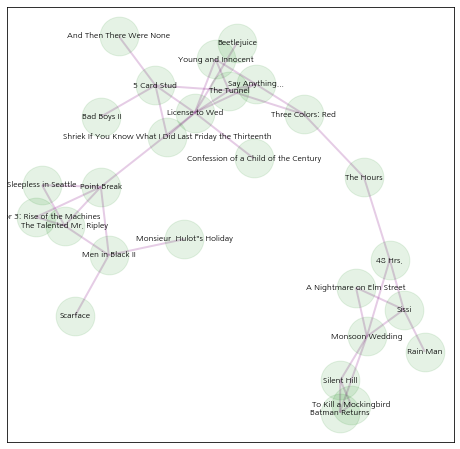

In [65]:
import networkx as nx

# Network Graph 생성
G = nx.from_pandas_edgelist(network)

fig,ax = plt.subplots(1, 1, figsize=(8,8))
layout = nx.spring_layout(G, k=.4)
nx.draw_networkx_nodes(G, pos=layout, node_size=1500, node_color='green', alpha=.1, ax=ax)
nx.draw_networkx_edges(G, pos=layout, width=2, edge_color='purple', alpha=.2, ax=ax)
nx.draw_networkx_labels(G, pos=layout, font_size=8, font_color='black', font_family='NanumGothic', ax=ax)
plt.show()

## Q 8

```
영화 관객의 영화 관람 정보와 평점을 바탕으로 보지 않은 영화의 평점을 추정하여 가장 만족할 만한 영화를 찾으려고 한다. 
먼저 Data를 Training Set과 Test Set을 8:2의 비중으로 나누고 Training Set으로 유사한 영화 취향을 갖는 관객을 기반으로 추천 모델을 생성한다. (Seed=123/Group by userID)

즉, User Based Collaborative Filtering 방법으로 학습을 추천화(Collaborative Filtering Train)하되, 가까운 5명의 유저, Cosine Similarity 를 사용한다. 

그런 다음, Test Set으로 예측한 평점이 실제 평점과 얼마나 차이가 있는지 비교한다. 이때 실제평점과 예측평점의 MAPE를 산출하시오.
	단, 예측 평점이 Null인 경우 평가에서 제외, 평점 0미만으로 나오면 0으로, 5이상으로 나오면 5로 조정한다.
	MAPE 값은 값은 소수점 4째자리 이하는 버림하시오
(답안예시) 0.123
```

[sklearn - surprise](https://pypi.org/project/scikit-surprise/)

In [66]:
# surprise 모듈 설치
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-win_amd64.whl size=749904 sha256=efbeac6e856d6ef25f2ab840fd64e8d11c5019eefafd081401b93adbc251a9f4
  Stored in directory: C:\Users\djohn\AppData\Local\pip\Cache\wheels\78\9c\3d\41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [67]:
from surprise import KNNBasic, SVD, BaselineOnly
from surprise import accuracy, Reader, Dataset
from surprise import model_selection
from scipy.sparse import csr_matrix

from collections import defaultdict

In [68]:
sim_options = {'name': 'cosine',
               'user_based': True
               }
model = KNNBasic(sim_options=sim_options, random_state=123)

In [69]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings.drop('timestamp', 1), reader)
train, test = model_selection.train_test_split(data, test_size=0.2, random_state=1234)

In [70]:
model.fit(train)
predictions = model.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [71]:
# 평가 지표
def mape(predictions):
    actual = []
    pred = []
    for p in predictions:
        actual.append(p.r_ui)
        pred.append(p.est)
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [72]:
mape(predictions)

30.91436478811586

## Q 9

```
영화 관객의 영화 관람 정보와 평점을 바탕으로 보지 않은 영화의 평점을 추정하여 가장 만족할 만한 영화를 찾으려고 한다. 
먼저 Data를 Training Set과 Test Set을 8:2의 비중으로 나누고 Training Set으로 유사한 영화 취향을 갖는 관객을 기반으로 추천 모델을 생성한다. (Seed=123/Group by userID)

ALS 방법으로 다음과 같이 학습 후
- Implicit Preference=True
- Seed: 1234

Test Set으로 예측한 평점이 실제 평점과 얼마나 차이가 있는지 비교한다. 이때 실제평점과 예측평점의 MAPE를 산출하시오.
- 단, 예측 평점이 Null인 경우 평가에서 제외, 평점 0미만으로 나오면 0으로, 5이상으로 나오면 5로 조정한다.
- MAPE 값은 값은 소수점 4째자리 이하는 버림하시오
(답안예시) 0.123
```

In [73]:
model = BaselineOnly(bsl_options={'method': 'als'})
model.fit(train)

Estimating biases using als...


In [74]:
predictions = model.test(test)

In [75]:
mape(predictions)

28.483024984919247

## Q 10

```
사용자별 Top 5 영화 목록을 생성하고자 한다

UserID<=500만을 대상으로 한다(총 447명)
UserID<=500이 한번이라도 평점을 한 영화만을 대상으로 한다(총 1892개).

이미 평점을 한 경우 기존 평점의 최소값 사용
미 평점 영화는 이미 평점을 한 영화에 대한 최소값을 이용하여 CF 모형을 이용하여 구한다
- 가까운 5명의 Neighbor
- Cosine Similarity
- User Base이용
- 예측 rating은 null이거나 음수이면 0, 5점 이상이면 5점으로 변환

이 방법으로 구한 UserID=1의 Top5 영화 목록을 평점 순으로 기술하시오?
(답안예시) a,b,c,d,e
```

In [76]:
ratings_500 = ratings.loc[ratings['userId'] <= 500]
ratings_500

userId  movieId  rating     timestamp
0           1     1371     2.5  1.260759e+09
1           4     1371     4.0  9.498103e+08
2           7     1371     3.0  8.518692e+08
3          19     1371     4.0  8.551934e+08
4          21     1371     3.0  8.538523e+08
...       ...      ...     ...           ...
43241     299    62764     4.5  1.344184e+09
43242     299    77291     5.0  1.344179e+09
43243     299    87884     3.5  1.344179e+09
43244     299    92424     4.0  1.344181e+09
43245     299    95752     4.5  1.344179e+09

[31166 rows x 4 columns]

In [77]:
ratings_500.groupby('movieId').count()

userId  rating  timestamp
movieId                           
2            81      81         81
3            37      37         37
5            41      41         41
6            75      75         75
11           58      58         58
...         ...     ...        ...
132961        1       1          1
134368        2       2          2
140174        4       4          4
142507        1       1          1
158238        2       2          2

[1892 rows x 3 columns]

In [78]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_500[['userId', 'movieId', 'rating']], reader)

train = data.build_full_trainset()

sim_options = {'name': 'cosine',
               'user_based': True
               }
algo = KNNBasic(sim_options=sim_options, random_state=123)
algo.fit(train)

# train에 있는 데이터는 제외
test = train.build_anti_testset()
predictions = algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [79]:
idx_to_movie = {row['id']: row['title'] for idx, row in movies.iterrows()}
movie_to_idx = {row['title']: row['id'] for idx, row in movies.iterrows()}

In [80]:
def get_top_n(predictions, n=10):
    # user - prediction 매핑
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # highest 기준으로 sort
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [81]:
top_n = get_top_n(predictions, n=5)

In [87]:
movie_list = []
for uid, user_ratings in top_n.items():
    a = [idx_to_movie[iid] for (iid, _) in user_ratings if iid in idx_to_movie.keys()]
    # userId == 1 일때 예측
    if uid == 6:
        movie_list.extend(a)
        break

# 결과 출력
movie_list

['Ninotchka', 'The Crazy Stranger', 'Breakfast on Pluto', '50 First Dates']